# Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import os
import math

In [2]:
# Mouting with google drive in case running on colab
# Skip this cell if you run locally

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [4]:
# Path to data folder
data_folder = '/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/'

# Choose one of 2 versions below:
# Uncomment below line to choose scaled data version
# data_version = 'data_processed_withscale.csv'

# Uncomment below line to choose non-scaled data version
# data_version = 'data_processed_withoutscale.csv'

# Uncomment below line to choose raw data version
data_version = 'no2_stations.csv'

In [19]:
data = pd.read_csv(os.path.join(data_folder, data_version))

data.drop('Unnamed: 18', axis='columns', inplace = True)
data

,time,lat,lon,NO2,name,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,ndvi,pplt_dens,road_dens,omi_no2
0,1/1/2019,21.0491,105.8831,0.000000,NVC,391.864014,102794.0,66.589302,11.087100,4.69022,5.980500,5.019875,4.711437,4.758125,0.134988,27.722601,1828.880005,0.000000
1,1/2/2019,21.0491,105.8831,0.000000,NVC,558.942993,102699.0,65.773903,12.090000,3.59040,2.657062,4.092187,8.700875,7.603187,0.000000,27.722601,1828.880005,0.000000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,326.197998,102453.0,69.259697,13.018900,2.96978,5.755687,6.602938,8.837000,9.167312,0.000000,27.722601,1828.880005,0.000000
3,1/4/2019,21.0491,105.8831,39.379204,NVC,197.524994,102181.0,78.663696,15.516100,2.77573,8.956062,10.830875,13.301438,13.640625,0.000000,27.722601,1828.880005,0.000000
4,1/5/2019,21.0491,105.8831,39.901879,NVC,287.825012,102072.0,75.866699,17.658199,3.12869,12.547000,12.891687,15.638813,12.034750,0.000000,27.722601,1828.880005,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,454.903015,102068.0,43.484299,16.768499,3.66034,7.437375,5.100375,3.930875,6.508750,0.000000,442.738007,4993.080078,0.000000
5471,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,400.079010,101755.0,49.469700,19.499901,2.41066,13.452063,12.091188,5.180625,9.206437,0.000000,442.738007,4993.080078,0.000000
5472,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,326.407013,101510.0,66.391800,22.555500,1.45771,17.722375,16.551500,13.518500,18.223813,0.000000,442.738007,4993.080078,0.000089
5473,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,468.182007,101796.0,64.951401,23.062800,4.10253,16.676687,14.273500,16.221062,18.177937,0.000000,442.738007,4993.080078,0.000000


The data includes 18 features, with NO2 is the target feature. This data is observed through out 2019 (from 1/1/2019 to 31/12/2019) by total 15 stations in Viet Nam. Now get deep into detail with this data.

# Exploratory Data Analysis

## Checking Null Values

In [20]:
data.isnull().sum()

time          0
lat           0
lon           0
NO2           0
name          0
pblh          0
press         0
rh            0
tmp           0
wspd          0
dpt_00        0
dpt_06        0
dpt_12       15
dpt_18       15
ndvi          0
pplt_dens     0
road_dens     0
omi_no2       0
dtype: int64

Data contains some NaN values in dpt_12 and dpt_18 features

## Finding all stations

In [21]:
stations = data['name'].unique()
stations = pd.DataFrame(stations)
stations

,0
0,NVC
1,ChiCuc
2,DaNang
3,HaLong-QuangNinh
4,HangDau
5,HoanKiem
6,Hue
7,KimLien
8,MinhKhai
9,MyDinh


There are total 15 stations in the dataset. If we observed more, we can see that the dataset contains 5475 samples, which mean that each station is observed 365 days a year !

## NO2 Analysis

In [22]:
data['NO2'].describe()

count      5475.000000
mean        148.585501
std        8819.149707
min           0.000000
25%          11.848333
50%          19.669937
75%          32.616674
max      651519.076000
Name: NO2, dtype: float64

The NO2 mean is only 148.5 while the maximum values is over 650.000. This mean that there are some 'noise' NO2 data.

### Finding NO2 zero values

In [23]:
data[data.NO2 == 0]

,time,lat,lon,NO2,name,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,ndvi,pplt_dens,road_dens,omi_no2
0,1/1/2019,21.04910,105.8831,0.0,NVC,391.864014,102794.0,66.589302,11.087100,4.69022,5.980500,5.019875,4.711437,4.758125,0.134988,27.722601,1828.880005,0.000000
1,1/2/2019,21.04910,105.8831,0.0,NVC,558.942993,102699.0,65.773903,12.090000,3.59040,2.657062,4.092187,8.700875,7.603187,0.000000,27.722601,1828.880005,0.000000
64,3/6/2019,21.04910,105.8831,0.0,NVC,524.786011,101198.0,66.387001,22.344801,5.70462,14.272750,15.003125,16.927375,16.062125,0.126970,27.722601,1828.880005,0.000000
67,3/9/2019,21.04910,105.8831,0.0,NVC,270.522003,101147.0,77.219902,19.234800,4.32757,17.447375,15.253000,13.705687,13.831750,0.000000,27.722601,1828.880005,0.000000
68,3/10/2019,21.04910,105.8831,0.0,NVC,337.148010,101412.0,73.188500,18.465099,2.74945,13.480187,12.226688,14.100437,14.062125,0.000000,27.722601,1828.880005,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,9/29/2019,21.33847,105.3673,0.0,PhuTho,391.587006,101070.0,61.905602,26.510500,1.90538,19.015937,17.654062,18.039625,17.331312,0.000000,13.386000,1645.660034,0.000071
4287,9/30/2019,21.33847,105.3673,0.0,PhuTho,441.390015,100733.0,62.484001,27.240101,1.65616,19.275063,20.237437,18.079500,17.600875,0.523735,13.386000,1645.660034,0.000125
4288,10/1/2019,21.33847,105.3673,0.0,PhuTho,565.278992,100627.0,66.894501,28.412300,3.35296,21.347062,22.691063,20.381312,19.842750,0.000000,13.386000,1645.660034,0.000068
4352,12/4/2019,21.33847,105.3673,0.0,PhuTho,440.016998,102359.0,49.947601,14.752100,3.27095,6.932375,3.534187,1.008312,5.391375,0.000000,13.386000,1645.660034,0.000056


### Finding large NO2 values

In [24]:
data[data.NO2 > 100]

,time,lat,lon,NO2,name,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,ndvi,pplt_dens,road_dens,omi_no2
927,7/17/2019,16.07400,108.2170,37321.263950,DaNang,267.233002,100037.0,82.600403,28.599800,3.30833,26.049125,24.743938,24.239812,25.555312,0.000000,365.862,3696.620117,0.000015
1082,12/19/2019,16.07400,108.2170,651519.076000,DaNang,437.183014,101298.0,81.428299,25.852501,2.19213,22.905250,22.515875,21.468688,21.745125,0.164249,365.862,3696.620117,0.000000
4132,4/28/2019,21.33847,105.3673,104.062462,PhuTho,541.179993,100484.0,75.022598,28.047899,6.46624,22.087750,22.446875,23.212312,22.951750,0.000000,13.386,1645.660034,0.000000


There are only 3 sample with NO2 > 100. But they are extremely high. So we considered them 'noise' data

### NO2 Distribution

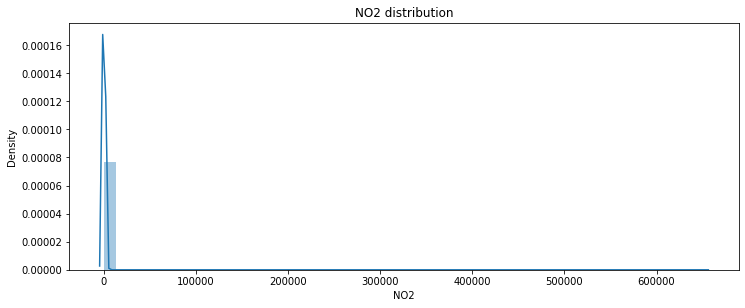

In [25]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('NO2 distribution')
sns.distplot(data['NO2'])

## Predictor Analysis

### Finding zero values in the predictor features (Features that use to predict NO2 values)

In [26]:
# def drop_cols(df):
#   drops = ['Unnamed: 18','time', 'name', 'omi_no2', 'ndvi'] 
#   if len(drops) > 0:
#     for col in drops:
#       if col in df:
#         df.drop(col, axis = 'columns', inplace = True)

def find_zeros_cols(df):
  cols = df.columns
  # threshold = 0.5
  for col in cols:
    print('Number of zero values in {}:'.format(col), round(len(data[data[col] == 0])/len(data[col])*100,3),'%')
      # print(col)

# drop_cols(data)
find_zeros_cols(data)

Number of zero values in time: 0.0 %
Number of zero values in lat: 0.0 %
Number of zero values in lon: 0.0 %
Number of zero values in NO2: 14.265 %
Number of zero values in name: 0.0 %
Number of zero values in pblh: 0.0 %
Number of zero values in press: 0.0 %
Number of zero values in rh: 0.0 %
Number of zero values in tmp: 0.0 %
Number of zero values in wspd: 0.0 %
Number of zero values in dpt_00: 0.0 %
Number of zero values in dpt_06: 0.0 %
Number of zero values in dpt_12: 0.0 %
Number of zero values in dpt_18: 0.0 %
Number of zero values in ndvi: 93.717 %
Number of zero values in pplt_dens: 6.667 %
Number of zero values in road_dens: 0.0 %
Number of zero values in omi_no2: 72.091 %


As can be seen above, the ndvi and omi_no2 feature are almost zero values, while the other features have no zero values.

### Predictors Distribution

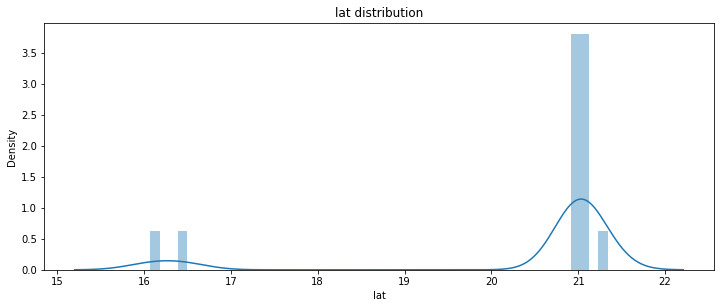

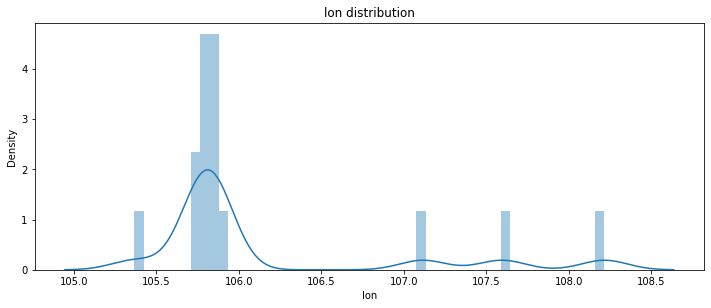

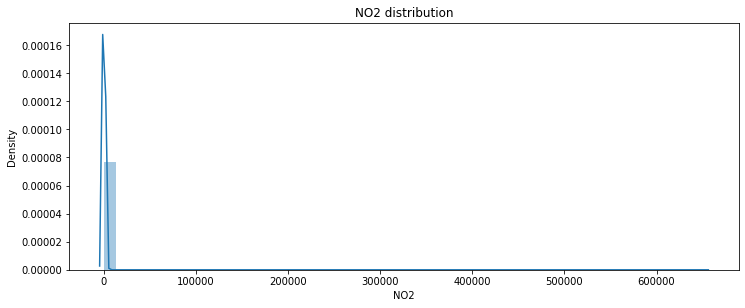

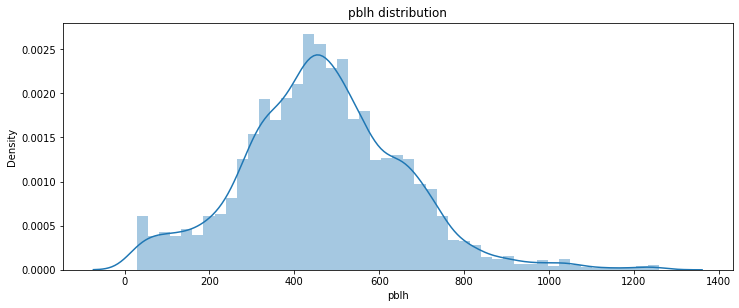

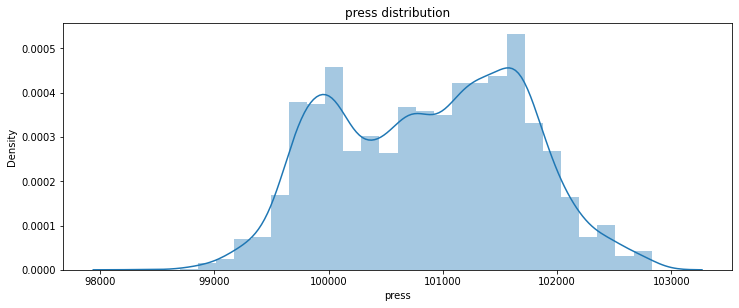

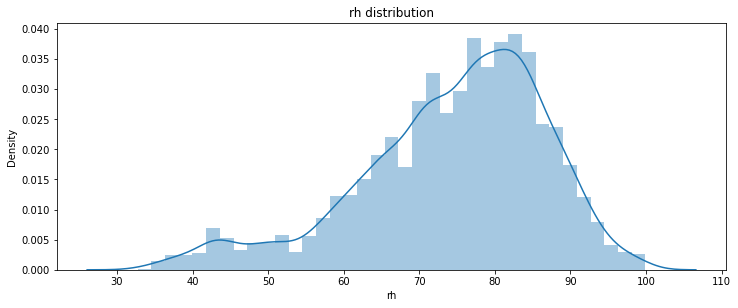

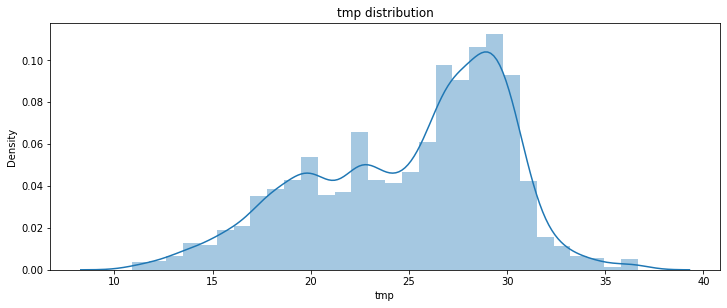

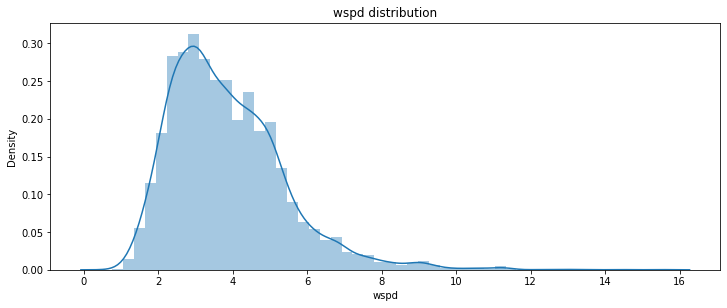

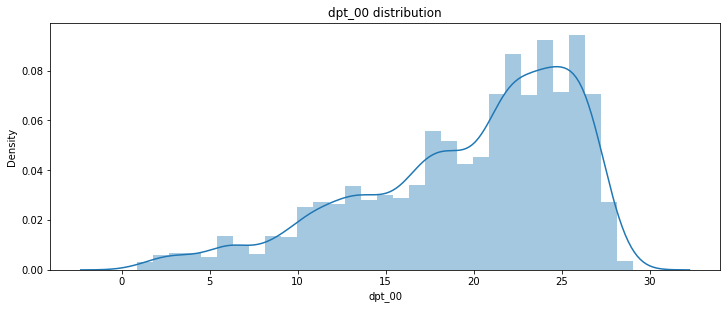

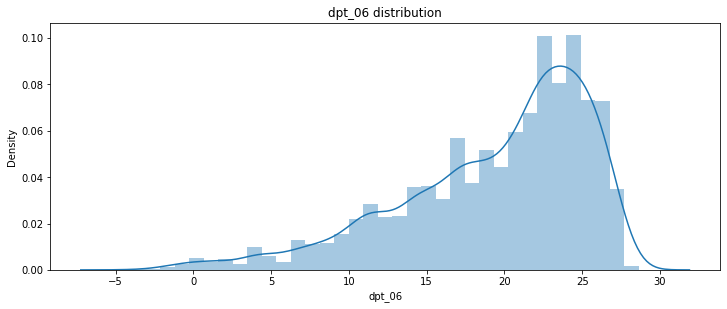

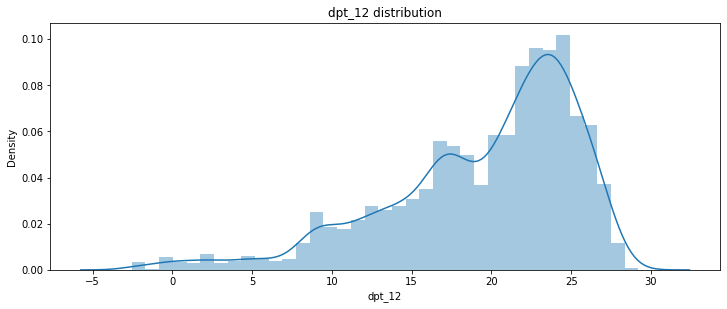

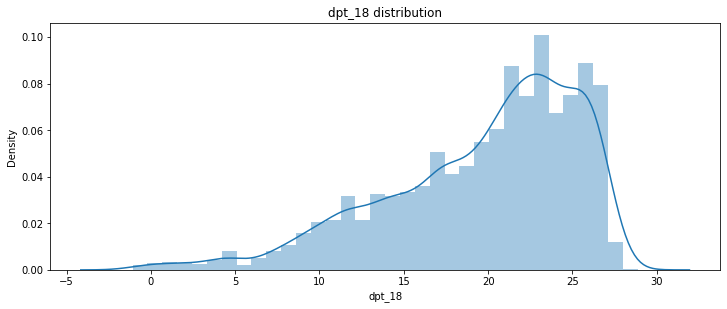

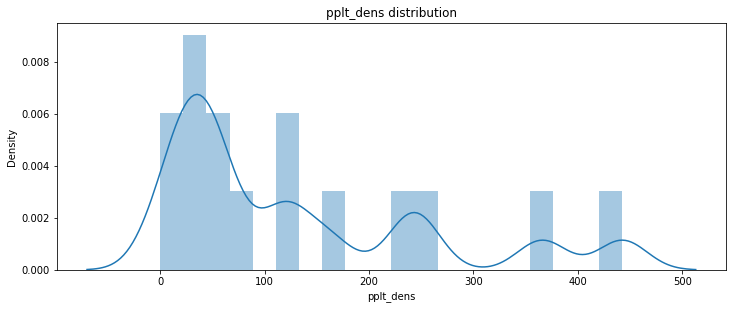

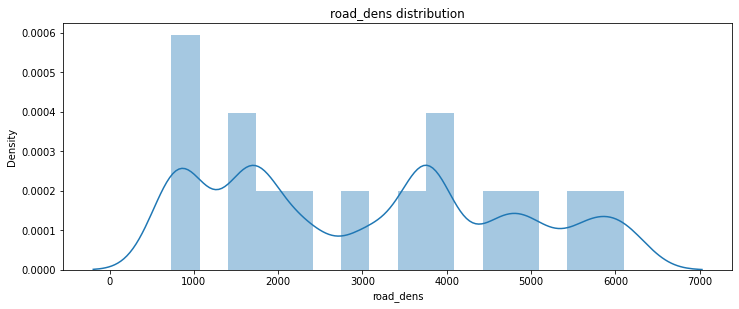

In [ ]:
cols = data.columns.tolist()
for col in cols:
  plt.figure(figsize=(12,10))
  plt.subplot(211)
  plt.title('{} distribution'.format(col))
  sns.distplot(data[col])

## Feature Correlation

### Correlation with Original Data

In [27]:
original_corr = data.corr()
original_corr

,lat,lon,NO2,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,ndvi,pplt_dens,road_dens,omi_no2
lat,1.000000,-0.899221,-0.037717,0.270398,0.019660,-0.269346,-0.059533,0.059419,-0.171862,-0.181894,-0.176725,-0.179246,0.001132,-0.356634,-0.167240,0.061509
lon,-0.899221,1.000000,0.037512,-0.358493,-0.018487,0.301217,0.017764,0.076331,0.156612,0.167646,0.159831,0.162812,-0.001144,0.283729,0.059131,0.000594
NO2,-0.037717,0.037512,1.000000,-0.002638,0.005992,0.007915,0.002989,-0.014603,0.008059,0.007652,0.005144,0.005743,0.023146,0.025823,0.005572,-0.006115
pblh,0.270398,-0.358493,-0.002638,1.000000,-0.277167,-0.365954,0.468008,0.301639,0.201692,0.167267,0.175099,0.192790,0.021779,-0.023538,0.052931,0.036314
press,0.019660,-0.018487,0.005992,-0.277167,1.000000,-0.377785,-0.832756,-0.276873,-0.853361,-0.822279,-0.818673,-0.857452,-0.033191,0.008460,0.007278,0.078546
rh,-0.269346,0.301217,0.007915,-0.365954,-0.377785,1.000000,0.110149,0.104055,0.551981,0.581120,0.621292,0.587673,-0.048067,0.032444,-0.068999,-0.318681
tmp,-0.059533,0.017764,0.002989,0.468008,-0.832756,0.110149,1.000000,0.173923,0.862773,0.826738,0.807702,0.842975,0.044403,0.049242,0.059164,0.003931
wspd,0.059419,0.076331,-0.014603,0.301639,-0.276873,0.104055,0.173923,1.000000,0.188798,0.152547,0.217587,0.219910,0.000155,-0.007378,-0.047037,-0.055793
dpt_00,-0.171862,0.156612,0.008059,0.201692,-0.853361,0.551981,0.862773,0.188798,1.000000,0.953809,0.918369,0.945911,0.015679,0.066670,0.029682,-0.147702
dpt_06,-0.181894,0.167646,0.007652,0.167267,-0.822279,0.581120,0.826738,0.152547,0.953809,1.000000,0.910301,0.928347,0.018928,0.060541,0.025072,-0.162017


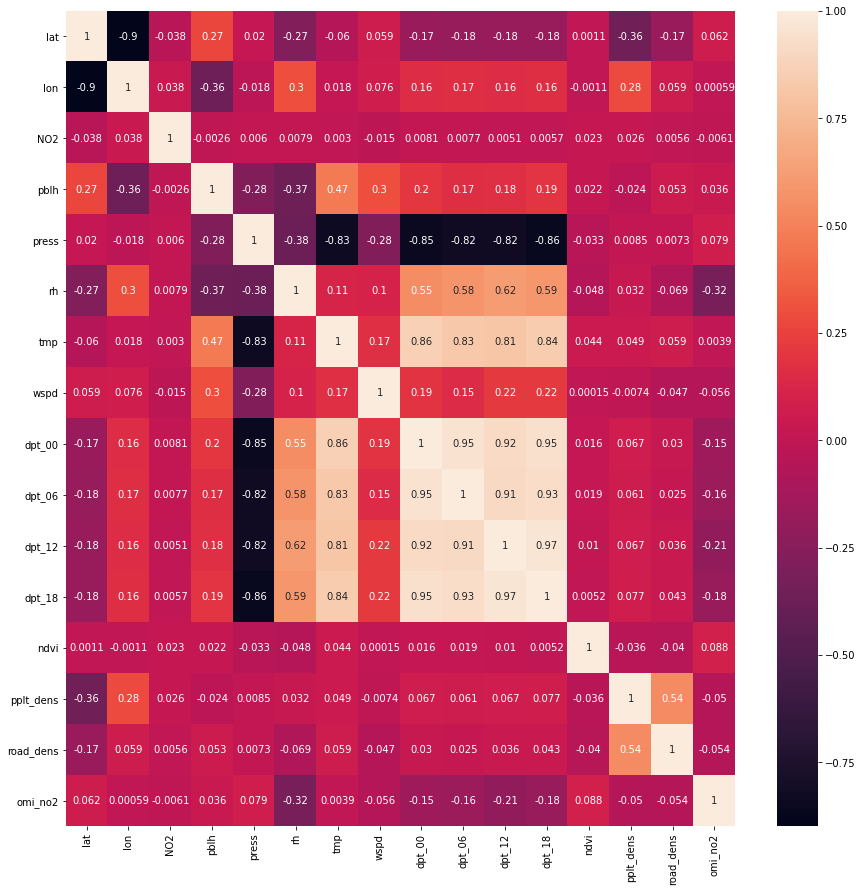

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(original_corr, annot=True)

As we can see above, there are little correlation between predictors and NO2 if we use the original data. So we tried to dropped 'noise' NO2 data and re-plot the correlation matrix again.

### Correlation with Dropped Data

In [34]:
# Dropping noise NO2 samples

dropped_data = data[(data.NO2 > 0) & (data.NO2 < 100)]
dropped_data.shape

(4691, 18)

In [35]:
dropped_corr = dropped_data.corr()
dropped_corr

,lat,lon,NO2,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,ndvi,pplt_dens,road_dens,omi_no2
lat,1.000000,-0.880416,-0.282568,0.146995,0.012824,-0.137412,-0.079154,-0.027053,-0.137575,-0.128225,-0.116031,-0.130526,0.011683,-0.356864,-0.097518,0.046067
lon,-0.880416,1.000000,0.336577,-0.195956,-0.047957,0.146964,0.092533,0.191487,0.157577,0.146378,0.129144,0.149500,-0.004207,0.263374,0.020826,0.049344
NO2,-0.282568,0.336577,1.000000,-0.046895,-0.108209,-0.013265,0.125926,0.047335,0.099982,0.098283,0.070972,0.084080,-0.037172,0.151241,0.064225,0.108608
pblh,0.146995,-0.195956,-0.046895,1.000000,-0.289427,-0.269793,0.463866,0.303212,0.226524,0.204921,0.217041,0.226437,0.029026,0.000008,0.033401,0.022748
press,0.012824,-0.047957,-0.108209,-0.289427,1.000000,-0.455763,-0.840727,-0.329411,-0.865514,-0.839207,-0.832599,-0.871390,-0.033606,0.001890,0.023506,0.087973
rh,-0.137412,0.146964,-0.013265,-0.269793,-0.455763,1.000000,0.199096,0.147873,0.604495,0.622875,0.664989,0.636824,-0.054276,-0.010041,-0.080938,-0.328370
tmp,-0.079154,0.092533,0.125926,0.463866,-0.840727,0.199096,1.000000,0.206636,0.874098,0.846214,0.823191,0.856028,0.047753,0.045244,0.024376,-0.011629
wspd,-0.027053,0.191487,0.047335,0.303212,-0.329411,0.147873,0.206636,1.000000,0.225926,0.185459,0.259375,0.262449,-0.001685,-0.016639,-0.033533,-0.055724
dpt_00,-0.137575,0.157577,0.099982,0.226524,-0.865514,0.604495,0.874098,0.225926,1.000000,0.958863,0.919157,0.947832,0.016398,0.047295,-0.001590,-0.156943
dpt_06,-0.128225,0.146378,0.098283,0.204921,-0.839207,0.622875,0.846214,0.185459,0.958863,1.000000,0.910104,0.930152,0.019741,0.038962,-0.005386,-0.168930


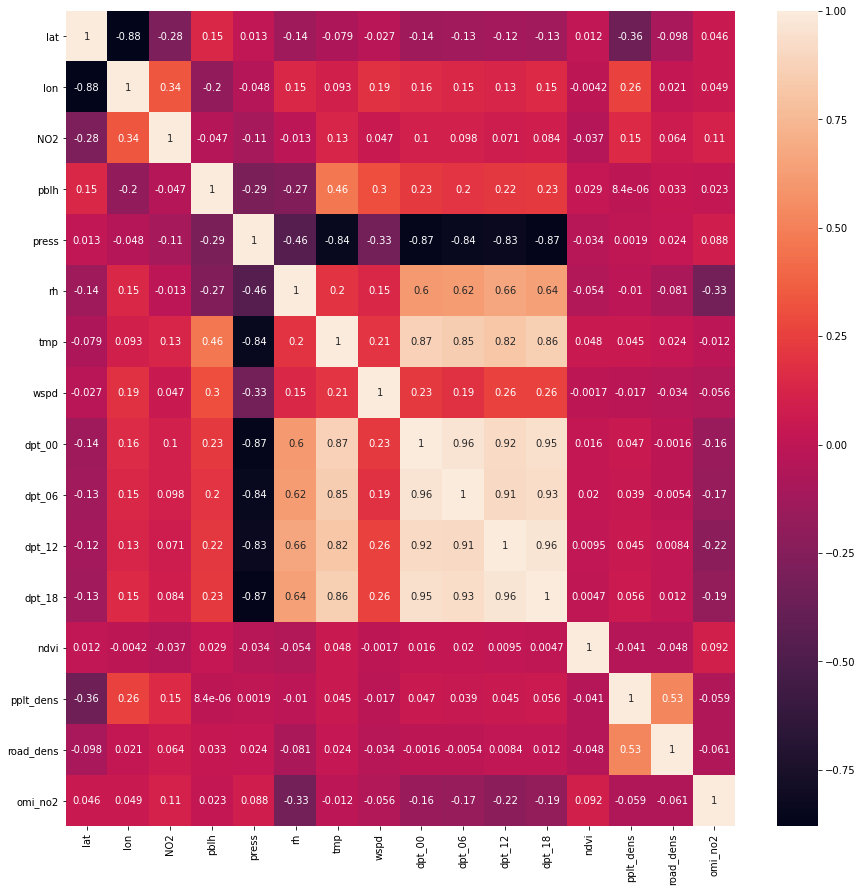

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(dropped_corr, annot=True)

### Finding top correlated features

In [42]:
# Setting a threshold to find out which predictors have correlated score that higher than threshold
threshold = 0.05

corr_no2 = abs(dropped_corr['NO2'])
features = data.drop('NO2', axis = 'columns')

for col in features.columns:
  if col not in ['time', 'name']:
    if corr_no2[col] > threshold:
      print(col,':', corr_no2[col])


lat : 0.28256761333171976
lon : 0.3365765865592893
press : 0.10820911380959841
tmp : 0.12592620854516803
dpt_00 : 0.09998232614357921
dpt_06 : 0.09828348817398948
dpt_12 : 0.07097180107628805
dpt_18 : 0.08408006494267052
pplt_dens : 0.15124076665968242
road_dens : 0.0642249586510578
omi_no2 : 0.10860835791113534
